In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\users\rendo\08-2020 Instacart Basket Analysis'

In [7]:
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'order_prods_all_updated.pkl'))

In [8]:
df_ords_prods_all.shape

(30629741, 33)

In [9]:
df_ords_prods_all.head()

,user_id,first,last,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer


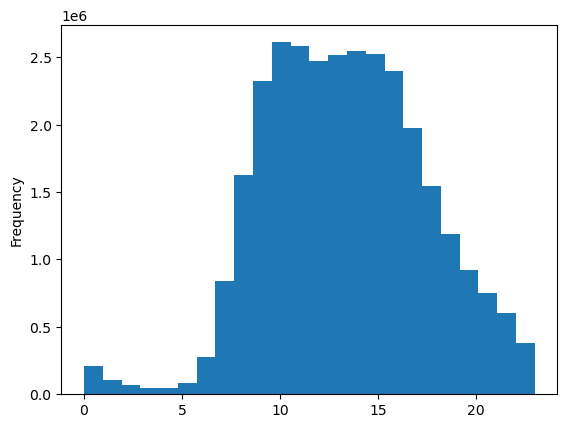

In [12]:
# histogram for hour of day
hist_orders_hour_of_day = df_ords_prods_all['hour_of_day'].plot.hist(bins = 24)

## we can see with this histogram the most amount of orders are from 9AM to 4PM

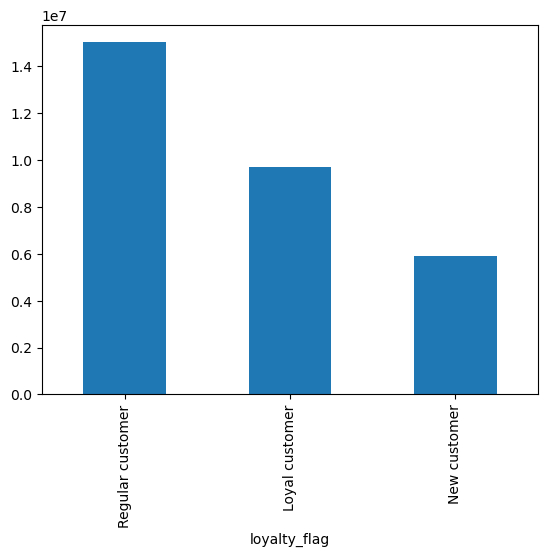

In [13]:
# bar chart for loyal customers
bar_loyalty_flag = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar()

## regular customers are the prominent purchasers.

In [14]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [15]:
dev

array([False,  True, False, ..., False,  True,  True])

In [16]:
big = df_ords_prods_all[dev]

In [17]:
small = df_ords_prods_all[~dev]

In [19]:
#checking count of whole df
len(df_ords_prods_all)

30629741

In [20]:
len(big)+len (small)

30629741

In [21]:
df_2 = small[['hour_of_day','prices']]

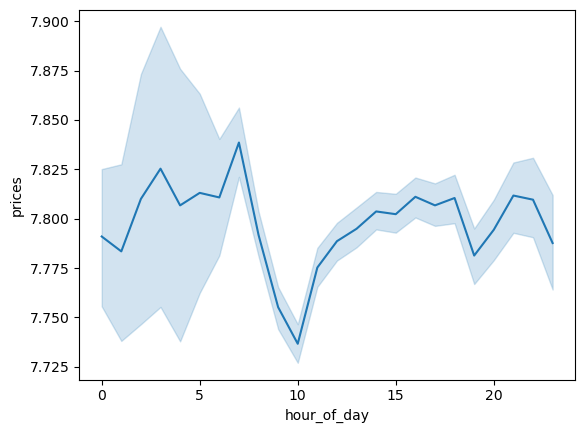

In [23]:
# line plot with the small df
line_hour_price = sns.lineplot(data = df_2, x = 'hour_of_day',y = 'prices')

## No relation between prices and hour of purchases.

In [24]:
#looking at the column names
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30629741 entries, 0 to 30629740
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 object 
 1   first                   object 
 2   last                    object 
 3   gender                  object 
 4   state                   object 
 5   age                     int64  
 6   date_joined             object 
 7   number_of_dependants    int64  
 8   marital_status          object 
 9   income                  int64  
 10  order_id                int64  
 11  order_number            int64  
 12  orders_day_of_week      int64  
 13  hour_of_day             int64  
 14  days_since_prior_order  float64
 15  product_id              int64  
 16  add_to_cart_order       int64  
 17  reordered               int64  
 18  product_name            object 
 19  aisle_id                int64  
 20  department_id           int64  
 21  prices                  float

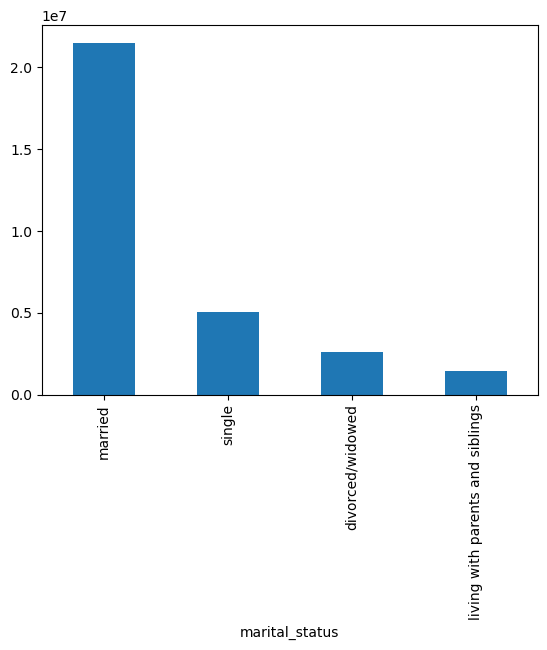

In [25]:
# bar chart for marital status
bar_marital = df_ords_prods_all['marital_status'].value_counts().plot.bar()

## Married couples make up the majority of instacart purchases.

In [26]:
# making age brackets flags column

df_ords_prods_all.loc[df_ords_prods_all['age'] >= 90, 'age_bracket'] = '90+'

In [27]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 89) & (df_ords_prods_all['age'] >= 80), 'age_bracket'] = '80-89'

In [28]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 79) & (df_ords_prods_all['age'] >= 70), 'age_bracket'] = '70-79'

In [29]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 69) & (df_ords_prods_all['age'] >= 60), 'age_bracket'] = '60-69'

In [30]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 59) & (df_ords_prods_all['age'] >= 50), 'age_bracket'] = '50-59'

In [31]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 49) & (df_ords_prods_all['age'] >= 40), 'age_bracket'] = '40-49'

In [32]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 39) & (df_ords_prods_all['age'] >= 30), 'age_bracket'] = '30-39'

In [33]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 29) & (df_ords_prods_all['age'] >= 20), 'age_bracket'] = '20-29'

In [34]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 19) & (df_ords_prods_all['age'] >= 10), 'age_bracket'] = '10-19'

In [35]:
#checking the count for the age brackets
df_ords_prods_all['age_bracket'].value_counts(dropna = False)

age_bracket
40-49    4815900
50-59    4804320
30-39    4795448
20-29    4785372
70-79    4784783
60-69    4717936
10-19     964840
80-89     961142
Name: count, dtype: int64

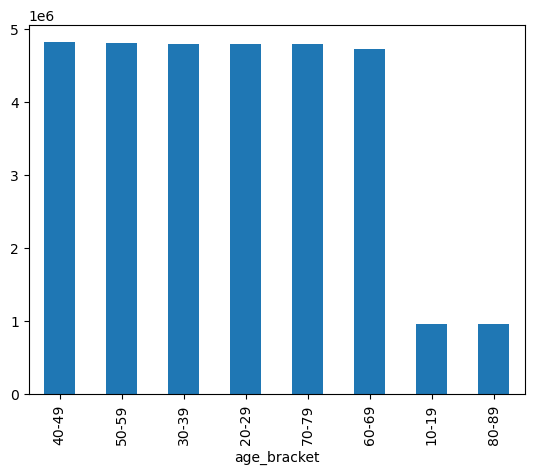

In [36]:
# bar chart on age bracket
bar_age_bracket = df_ords_prods_all['age_bracket'].value_counts().plot.bar()

## Instacart users are less between 10-19 and 80-89. all others are similar.

In [37]:
df_ords_prods_all.head()

,user_id,first,last,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,age_bracket
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,40-49
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,40-49
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,40-49
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,40-49
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,40-49


In [40]:
df_3 = small[['number_of_dependants','age']]

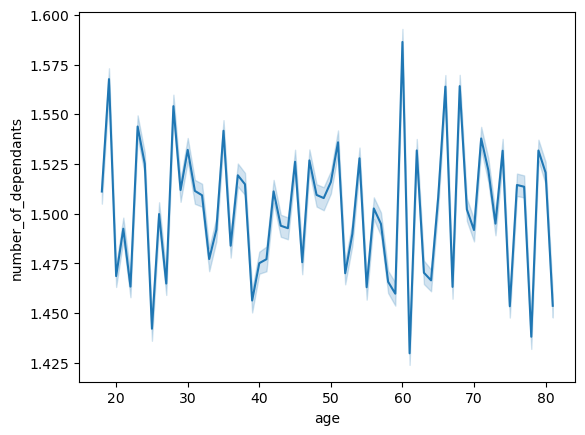

In [41]:
# line chart with age and number of dependants
line_age_dependants = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependants')

## This line chart shows no relation between age and dependants.

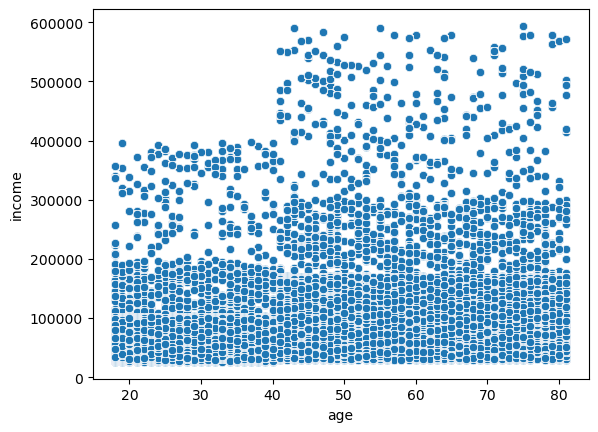

In [42]:
# scatterplot of age and income
scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_ords_prods_all)

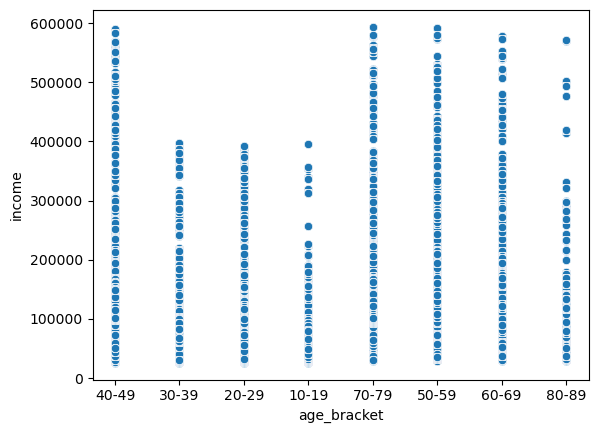

In [43]:
# scatterplot of age and income
scatter_age_bracket_income = sns.scatterplot(x = 'age_bracket', y = 'income',data = df_ords_prods_all)

### We can see once customers hit the 40-49 bracket income goes up significantly.

In [44]:
# saving all visualizations in Jupyter folder
hist_orders_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour_of_day.png'))

In [45]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [46]:
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

In [47]:
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital.png'))

In [48]:
bar_age_bracket.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_bracket.png'))

In [49]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [50]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))